<a href="https://colab.research.google.com/github/MugiwaraNoRushi/COVID-19/blob/master/Assignment_1_DSCI_552.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Importing all the required libraries and drive and reading the data

In [ ]:
# google drive imports
from google.colab import drive
# imports for running the assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Mount the drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Extract the folder in the drive
!unzip gdrive/My\ Drive/usc-dsci552-32415d-spring2021.zip > /dev/null # Dont show any output

In [ ]:
# Reading the csv file in the pandas data frame.
train_df = pd.read_csv('used_car_dataset.csv')
test_df = pd.read_csv('used_car_dataset_PREDICT.csv')
train_df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,type,paint_color,F1,F2,F3,F4
0,18219.0,2008.0,ford,excellent,8 cylinders,gas,86238.0,automatic,pickup,black,5823,2.193844,-0.031986,b
1,800.0,2008.0,ford,excellent,6 cylinders,gas,170953.0,automatic,SUV,red,2024,2.133691,0.097985,b
2,23660.0,2016.0,ford,good,8 cylinders,gas,119026.0,automatic,truck,white,294,2.160859,0.046984,c
3,5335.0,2009.0,ford,excellent,4 cylinders,gas,69000.0,manual,sedan,blue,3544,2.114929,-0.110121,c
4,1597.0,1999.0,ford,good,6 cylinders,gas,59130.0,automatic,sedan,blue,1329,1.829625,-0.060615,c


# 2.)Preprocessing the data

In [ ]:
# Checking the info of the data frame 
# only odometer values contains NA's.
# Using the median to fill the na values as it is more robust to the outliers
train_df.fillna(value = train_df['odometer'].median(),inplace= True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         9997 non-null   float64
 1   year          9997 non-null   float64
 2   manufacturer  9997 non-null   object 
 3   condition     9997 non-null   object 
 4   cylinders     9997 non-null   object 
 5   fuel          9997 non-null   object 
 6   odometer      9997 non-null   float64
 7   transmission  9997 non-null   object 
 8   type          9997 non-null   object 
 9   paint_color   9997 non-null   object 
 10  F1            9997 non-null   int64  
 11  F2            9997 non-null   float64
 12  F3            9997 non-null   float64
 13  F4            9997 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
# Comparing the test and the train_df has the same structure
print(train_df.head())
print(test_df.head())

     price    year manufacturer  condition  ...    F1        F2        F3 F4
0  18219.0  2008.0         ford  excellent  ...  5823  2.193844 -0.031986  b
1    800.0  2008.0         ford  excellent  ...  2024  2.133691  0.097985  b
2  23660.0  2016.0         ford       good  ...   294  2.160859  0.046984  c
3   5335.0  2009.0         ford  excellent  ...  3544  2.114929 -0.110121  c
4   1597.0  1999.0         ford       good  ...  1329  1.829625 -0.060615  c

[5 rows x 14 columns]
   row_number    year manufacturer  condition  ...    F1        F2        F3 F4
0           0  2005.0         ford       good  ...   437  2.063736  0.006316  b
1           1  2018.0         ford  excellent  ...  4160  2.544161  0.113114  c
2           2  2013.0         ford  excellent  ...  3836  2.316476  0.061427  a
3           3  2016.0         ford       good  ...  1690  2.338129  0.064887  c
4           4  2011.0         ford  excellent  ...  3293  2.234623  0.215401  b

[5 rows x 14 columns]


In [ ]:
# We will drop the test row number as it is the false index and it is the extra column in the test data.
test_df.drop(columns=['row_number'],inplace=True)
nn_test_df = test_df
test_df.head()

,year,manufacturer,condition,cylinders,fuel,odometer,transmission,type,paint_color,F1,F2,F3,F4
0,2005.0,ford,good,6 cylinders,gas,100963.0,automatic,sedan,red,437,2.063736,0.006316,b
1,2018.0,ford,excellent,6 cylinders,gas,51473.0,automatic,pickup,black,4160,2.544161,0.113114,c
2,2013.0,ford,excellent,8 cylinders,gas,170000.0,automatic,truck,white,3836,2.316476,0.061427,a
3,2016.0,ford,good,4 cylinders,gas,83755.0,automatic,sedan,white,1690,2.338129,0.064887,c
4,2011.0,ford,excellent,4 cylinders,gas,61434.0,automatic,sedan,silver,3293,2.234623,0.215401,b


# 3.) Feature Selection and Encoding the categorical columns

In [ ]:
# the fuel has only one values for both the train and test set
# thus removing the fuel from train and test
train_df.drop(columns = ['fuel'],inplace = True)
test_df.drop(columns = ['fuel'],inplace = True)
test_df.head()

,year,manufacturer,condition,cylinders,odometer,transmission,type,paint_color,F1,F2,F3,F4
0,2005.0,ford,good,6 cylinders,100963.0,automatic,sedan,red,437,2.063736,0.006316,b
1,2018.0,ford,excellent,6 cylinders,51473.0,automatic,pickup,black,4160,2.544161,0.113114,c
2,2013.0,ford,excellent,8 cylinders,170000.0,automatic,truck,white,3836,2.316476,0.061427,a
3,2016.0,ford,good,4 cylinders,83755.0,automatic,sedan,white,1690,2.338129,0.064887,c
4,2011.0,ford,excellent,4 cylinders,61434.0,automatic,sedan,silver,3293,2.234623,0.215401,b


In [ ]:
# Encoding the categories into One hot Encoders to find the correlation and we will remove the least correlated ones with price or 
# the ones which are most correlated among themselves.
# Encoding the categorical data 
dum_df = pd.get_dummies(train_df,columns = ["condition","cylinders","type","manufacturer","transmission","paint_color","F4"],prefix = "Type_is")
dum_df.head()

,price,year,odometer,F1,F2,F3,Type_is_excellent,Type_is_fair,Type_is_good,Type_is_like new,Type_is_4 cylinders,Type_is_6 cylinders,Type_is_8 cylinders,Type_is_SUV,Type_is_pickup,Type_is_sedan,Type_is_truck,Type_is_ford,Type_is_subaru,Type_is_automatic,Type_is_manual,Type_is_black,Type_is_blue,Type_is_red,Type_is_silver,Type_is_white,Type_is_a,Type_is_b,Type_is_c
0,18219.0,2008.0,86238.0,5823,2.193844,-0.031986,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0
1,800.0,2008.0,170953.0,2024,2.133691,0.097985,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
2,23660.0,2016.0,119026.0,294,2.160859,0.046984,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1
3,5335.0,2009.0,69000.0,3544,2.114929,-0.110121,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1
4,1597.0,1999.0,59130.0,1329,1.829625,-0.060615,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
# Seeing the correlation for each columns 
dum_df.corr()

,price,year,odometer,F1,F2,F3,Type_is_excellent,Type_is_fair,Type_is_good,Type_is_like new,Type_is_4 cylinders,Type_is_6 cylinders,Type_is_8 cylinders,Type_is_SUV,Type_is_pickup,Type_is_sedan,Type_is_truck,Type_is_ford,Type_is_subaru,Type_is_automatic,Type_is_manual,Type_is_black,Type_is_blue,Type_is_red,Type_is_silver,Type_is_white,Type_is_a,Type_is_b,Type_is_c
price,1.000000,0.323364,-0.371260,0.192230,0.293957,0.099625,0.055610,-0.166523,-0.093793,0.150487,-0.179371,0.065029,0.110902,-0.090871,0.183358,-0.253800,0.192508,0.032839,-0.032839,0.057916,-0.057916,0.045312,-0.018918,0.002433,-0.072954,0.029780,0.003865,0.000537,-0.004431
year,0.323364,1.000000,-0.239771,0.192563,0.898803,0.008190,0.133928,-0.219921,-0.145027,0.136476,0.195504,0.061893,-0.257429,0.102469,-0.074214,0.014057,-0.057929,-0.077609,0.077609,0.292434,-0.292434,0.013481,-0.050452,-0.072727,0.051918,0.040963,-0.004778,-0.003541,0.008396
odometer,-0.371260,-0.239771,1.000000,-0.175696,-0.217477,-0.005170,-0.066180,0.144452,0.103793,-0.136053,-0.122541,0.008401,0.112816,0.020249,-0.020270,-0.041517,0.038024,0.047434,-0.047434,0.003114,-0.003114,-0.005327,-0.023573,-0.018080,0.007702,0.029642,-0.013518,0.010912,0.002519
F1,0.192230,0.192563,-0.175696,1.000000,0.173151,-0.005872,0.132513,-0.097231,-0.063899,-0.053506,-0.013223,0.035543,-0.023449,0.001412,0.089289,-0.024765,-0.053970,0.024033,-0.024033,0.046958,-0.046958,-0.000896,0.014187,0.004399,-0.022075,0.004178,-0.003693,-0.009138,0.012983
F2,0.293957,0.898803,-0.217477,0.173151,1.000000,0.016584,0.119981,-0.197274,-0.128688,0.120578,0.180661,0.050512,-0.231012,0.096766,-0.071034,0.010838,-0.051427,-0.077516,0.077516,0.268169,-0.268169,0.011747,-0.046834,-0.067722,0.049500,0.037831,-0.004317,-0.001808,0.006173
F3,0.099625,0.008190,-0.005170,-0.005872,0.016584,1.000000,0.008903,-0.015402,-0.004812,0.002363,-0.002140,0.006400,-0.004461,-0.004135,-0.004243,0.003969,0.004045,0.007076,-0.007076,0.007857,-0.007857,-0.004127,0.015727,-0.011065,0.007331,-0.005069,-0.008227,-0.000102,0.008373
Type_is_excellent,0.055610,0.133928,-0.066180,0.132513,0.119981,0.008903,1.000000,-0.191413,-0.727213,-0.357359,0.096633,0.008309,-0.104323,0.077749,-0.073803,0.052470,-0.070890,-0.045793,0.045793,0.049592,-0.049592,0.036927,-0.025356,-0.043949,0.037717,-0.008450,-0.002932,-0.006279,0.009317
Type_is_fair,-0.166523,-0.219921,0.144452,-0.097231,-0.197274,-0.015402,-0.191413,1.000000,-0.146016,-0.071754,-0.052266,-0.000671,0.052493,-0.032681,0.045744,-0.032737,0.027790,0.017044,-0.017044,-0.104838,0.104838,0.004005,0.029596,0.023999,-0.029401,-0.020630,0.007184,-0.003619,-0.003551
Type_is_good,-0.093793,-0.145027,0.103793,-0.063899,-0.128688,-0.004812,-0.727213,-0.146016,1.000000,-0.272606,-0.106619,-0.017668,0.123846,-0.085416,0.083890,-0.039369,0.057038,0.053768,-0.053768,-0.027545,0.027545,-0.023868,0.012416,0.033912,-0.032610,0.010490,-0.006699,0.018593,-0.012127
Type_is_like new,0.150487,0.136476,-0.136053,-0.053506,0.120578,0.002363,-0.357359,-0.071754,-0.272606,1.000000,0.039165,0.013748,-0.052957,0.025484,-0.036972,-0.003679,0.008873,-0.018854,0.018854,0.025403,-0.025403,-0.024104,0.003529,0.003692,0.007186,0.009584,0.010282,-0.015756,0.005647


In [ ]:
# We can see that following variables has very less to no correlation with price
# F4
# paint color
# transmission
# We can see that odometer has a huge negative relationship with the price 
# Also F2 has 0.89 correlation with year, so we can remove the F2 also.
# Removing the F4,paint color and F2 and again encoding the train_df
train_df.drop(columns = ['F4'],inplace = True)
test_df.drop(columns = ['F4'],inplace = True)

train_df.drop(columns = ['paint_color'],inplace = True)
test_df.drop(columns = ['paint_color'],inplace = True)

train_df.drop(columns = ['F2'],inplace = True)
test_df.drop(columns = ['F2'],inplace = True)

In [ ]:
# Encoding these categorical columns into binary values as they contain only two different values so that we can find the correlation.
train_df['manufacturer'] = train_df['manufacturer'].map( {'ford':1, 'subaru':0} )
test_df['manufacturer'] = test_df['manufacturer'].map( {'ford':1, 'subaru':0} )

train_df['transmission'] = train_df['transmission'].map({'automatic':1,'manual':0})
test_df['transmission'] = test_df['transmission'].map({'automatic':1,'manual':0})

train_df.head()

,price,year,manufacturer,condition,cylinders,odometer,transmission,type,F1,F3
0,18219.0,2008.0,1,excellent,8 cylinders,86238.0,1,pickup,5823,-0.031986
1,800.0,2008.0,1,excellent,6 cylinders,170953.0,1,SUV,2024,0.097985
2,23660.0,2016.0,1,good,8 cylinders,119026.0,1,truck,294,0.046984
3,5335.0,2009.0,1,excellent,4 cylinders,69000.0,0,sedan,3544,-0.110121
4,1597.0,1999.0,1,good,6 cylinders,59130.0,1,sedan,1329,-0.060615


In [ ]:
# One hot encoding the remaining attributes
train_df = pd.get_dummies(train_df,columns = ["type","cylinders","condition"],prefix = "Type_is")
test_df = pd.get_dummies(test_df,columns = ["type","cylinders","condition"],prefix = "Type_is")
train_df.head()

,price,year,manufacturer,odometer,transmission,F1,F3,Type_is_SUV,Type_is_pickup,Type_is_sedan,Type_is_truck,Type_is_4 cylinders,Type_is_6 cylinders,Type_is_8 cylinders,Type_is_excellent,Type_is_fair,Type_is_good,Type_is_like new
0,18219.0,2008.0,1,86238.0,1,5823,-0.031986,0,1,0,0,0,0,1,1,0,0,0
1,800.0,2008.0,1,170953.0,1,2024,0.097985,1,0,0,0,0,1,0,1,0,0,0
2,23660.0,2016.0,1,119026.0,1,294,0.046984,0,0,0,1,0,0,1,0,0,1,0
3,5335.0,2009.0,1,69000.0,0,3544,-0.110121,0,0,1,0,1,0,0,1,0,0,0
4,1597.0,1999.0,1,59130.0,1,1329,-0.060615,0,0,1,0,0,1,0,0,0,1,0


In [ ]:
# train_df['cylinders'] = train_df['cylinders'].map({'4 cylinders':0,'6 cylinders':1,'8 cylinders':2})
# train_df['condition'] = train_df['condition'].map({'fair':0,'good':1,'excellent':2,'like new':3})
# train_df.head()

# 4.) Visualising the data and Removing outliers

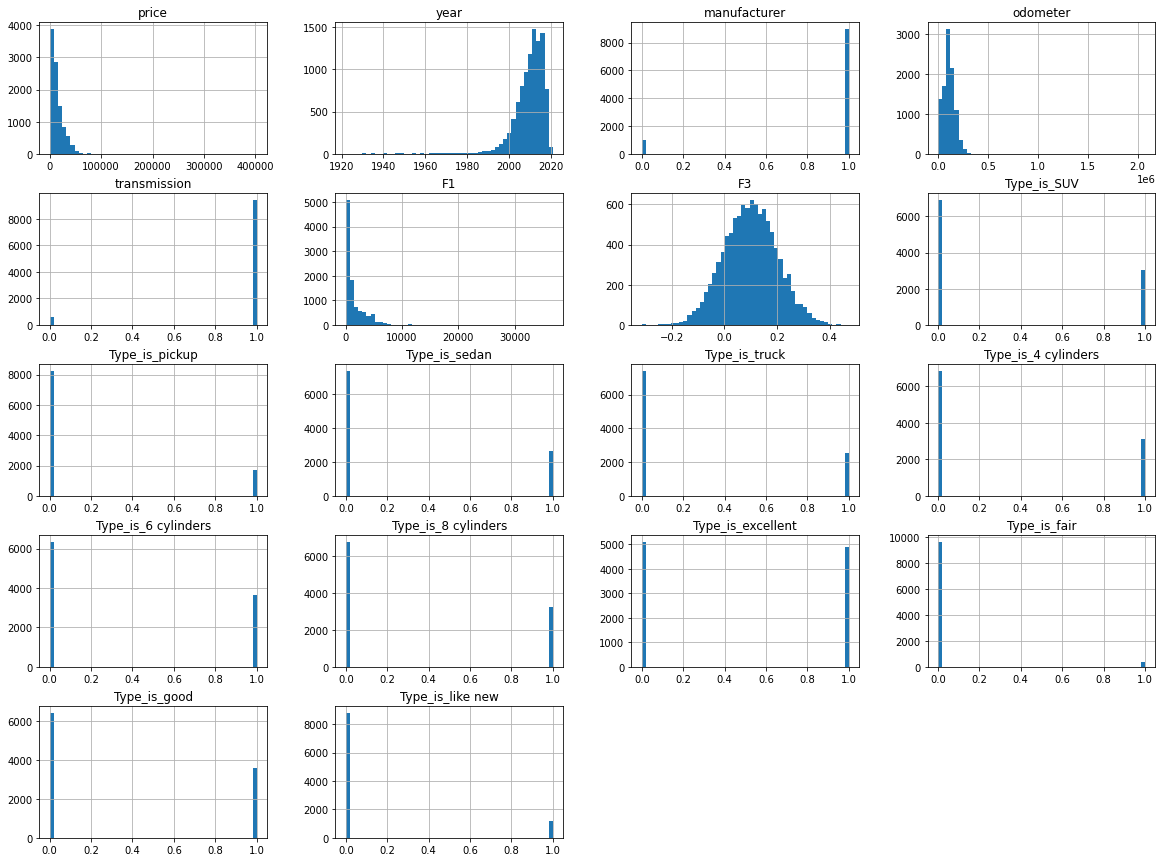

In [ ]:
# Visualising the data.
train_df.hist(bins=50, figsize=(20,15))
plt.show()

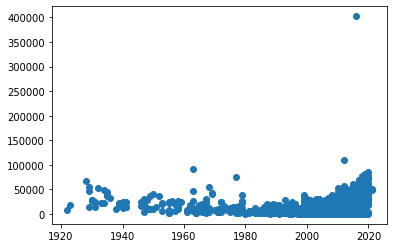

In [ ]:
# Scatter plotting between year and price => We can see that the price has some outliers
plt.scatter(train_df['year'],train_df['price'])

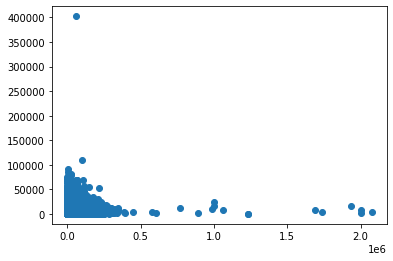

In [ ]:
# Scatter plot between odometer and price
plt.scatter(train_df['odometer'],train_df['price'])

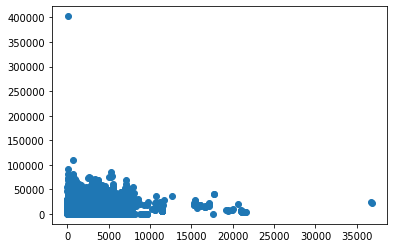

In [ ]:
# scatter plot between F1 and price 
plt.scatter(train_df['F1'],train_df['price'])

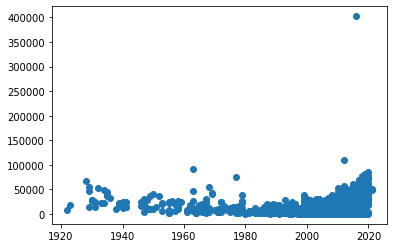

In [ ]:
plt.scatter(train_df['year'],train_df['price'])

In [ ]:
# Removing outliers from the F1 Attribute
train_df = train_df[train_df['F1'] <= 25000]

# Removing outliers from the odometer Attribute
train_df = train_df[train_df['odometer'] <= 1200000]

# After many tries I have found that outliers greater than 100000 and less than 1000 should be removed as they give better results
# Also there are many cars which have zero price, removing those rows assuming they are errors
train_df_final = train_df[train_df['price'] <= 100000]
train_df_final = train_df_final[train_df_final['price'] >= 1000]


train_df_final.reset_index()
min(train_df['year'])

1922.0

# 5.) Splitting the train set and applying various models


In [ ]:
X = train_df_final.values[:,1:]
Y = np.array(train_df_final['price'])

In [ ]:
train_x, valid_x, train_y, valid_y = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
# Simple Linear regression Model 
# We will be using this model as it is simple and it gives the best overall R2 score and rmse.


lin_model = linear_model.LinearRegression()
lin_model.fit(train_x, train_y)
y_predict = lin_model.predict(valid_x)

print('Coefficients: \n', lin_model.coef_)
# The mean squared error
print('Root Mean squared error: %.2f'
      % mean_squared_error(valid_y, y_predict)**0.5)
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(valid_y, y_predict))

Coefficients: 
 [ 3.81299974e+02 -2.54505151e+03 -7.97496446e-02 -2.72785654e+03
  7.31400133e-01  1.22228565e+04 -2.30720474e+03  3.26129410e+03
 -5.23554324e+03  4.28145388e+03 -3.23769161e+03  1.11943242e+03
  2.11825918e+03  8.66370523e+02 -3.83403399e+03 -2.30107534e+02
  3.19777100e+03]
Root Mean squared error: 7465.51
Coefficient of determination: 0.57


In [ ]:
# LASSO Regression

lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(train_x, train_y)
y_predict = lasso.predict(valid_x)

print('Coefficients: \n', lasso.coef_)
# The mean squared error
print('Root Mean squared error: %.2f'
      % mean_squared_error(valid_y, y_predict)**0.5)
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(valid_y, y_predict))


Coefficients: 
 [ 3.81296954e+02 -2.54372870e+03 -7.97527113e-02 -2.72586220e+03
  7.31406253e-01  1.22130632e+04 -3.16650094e+03  2.40086816e+03
 -6.09462122e+03  3.42131041e+03 -5.00582118e+03 -6.48760701e+02
  3.49816812e+02  1.37805775e+02 -4.55905260e+03 -9.58000709e+02
  2.46850633e+03]
Root Mean squared error: 7465.51
Coefficient of determination: 0.57


In [ ]:
# Ridge Regression

ridge = linear_model.Ridge(alpha=1.0)
ridge.fit(train_x, train_y)
y_predict = ridge.predict(valid_x)

print('Coefficients: \n', ridge.coef_)
# The mean squared error
print('Root Mean squared error: %.2f'
      % mean_squared_error(valid_y, y_predict)**0.5)
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(valid_y, y_predict))


Coefficients: 
 [ 3.81326724e+02 -2.53935965e+03 -7.97602358e-02 -2.72048071e+03
  7.31355853e-01  1.20671288e+04 -2.30567739e+03  3.25839013e+03
 -5.23167127e+03  4.27895853e+03 -3.23698223e+03  1.11871769e+03
  2.11826454e+03  8.63263541e+02 -3.82149832e+03 -2.32431727e+02
  3.19066651e+03]
Root Mean squared error: 7465.49
Coefficient of determination: 0.57


In [ ]:
# Elastic Net

elastic_net = linear_model.ElasticNet(random_state=0)
elastic_net.fit(train_x, train_y)
y_predict = elastic_net.predict(valid_x)

print('Coefficients: \n', elastic_net.coef_)
# The mean squared error
print('Root Mean squared error: %.2f'
      % mean_squared_error(valid_y, y_predict)**0.5)
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(valid_y, y_predict))


Coefficients: 
 [ 3.46441049e+02  1.14701279e+02 -8.23846382e-02 -1.38074348e+02
  7.86921669e-01  2.40822873e+02 -7.47451228e+02  9.44761810e+02
 -1.83185116e+03  1.63454057e+03 -1.75204996e+03  4.04460432e+02
  1.34658954e+03 -4.73973190e+01 -2.28333544e+02 -1.89063381e+02
  4.66794245e+02]
Root Mean squared error: 8126.58
Coefficient of determination: 0.49


# Neural Nets for competition

In [ ]:
X = train_df_final.values[:,1:]
Y = np.array(train_df_final['price'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax.fit(X)
X_transform = minmax.transform(X)
print(X_transform)
print(X)

import tensorflow as tf
from tensorflow import keras

Ann = keras.Sequential([  
                          keras.layers.Dense(17,activation = 'relu',input_dim = 17), # 128,64,64,1
                          keras.layers.Dense(9,activation = 'relu'),
                          keras.layers.Dense(9,activation = 'relu'),
                          keras.layers.Dense(5,activation = 'relu'),
                          keras.layers.Dense(1,activation = 'relu')
    ])
Ann.summary()

Ann.compile(optimizer='adam',
            loss='mean_absolute_error')

Ann.fit(X_transform,Y, epochs=100,validation_split=0.1)


y_predict = Ann.predict(X_transform)

print('Root Mean squared error: %.2f'
      % mean_squared_error(Y, y_predict)**0.5)

[[0.86868687 1.         0.081169   ... 0.         0.         0.        ]
 [0.94949495 1.         0.11202974 ... 0.         1.         0.        ]
 [0.87878788 1.         0.06494423 ... 0.         0.         0.        ]
 ...
 [0.95959596 1.         0.04945268 ... 0.         0.         0.        ]
 [0.91919192 1.         0.18542049 ... 0.         1.         0.        ]
 [0.93939394 1.         0.13082969 ... 0.         0.         0.        ]]
[[2.00800e+03 1.00000e+00 8.62380e+04 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [2.01600e+03 1.00000e+00 1.19026e+05 ... 0.00000e+00 1.00000e+00
  0.00000e+00]
 [2.00900e+03 1.00000e+00 6.90000e+04 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [2.01700e+03 1.00000e+00 5.25410e+04 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [2.01300e+03 1.00000e+00 1.97000e+05 ... 0.00000e+00 1.00000e+00
  0.00000e+00]
 [2.01500e+03 1.00000e+00 1.39000e+05 ... 0.00000e+00 0.00000e+00
  0.00000e+00]]
Model: "sequential_24"
_________________________________________

In [ ]:
import xgboost 
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                   gamma=0,                 
                   learning_rate=0.1,
                   max_depth=9,
                   min_child_weight=1.5,
                   n_estimators=5000,                                                                    
                   reg_alpha=0.75,
                   reg_lambda=0.45,
                   subsample=0.6,
                   seed=42)
best_xgb_model.fit(X_transform,Y)
y_predict=best_xgb_model.predict(X_transform)

[02:08:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print('Root Mean squared error: %.2f'
      % mean_squared_error(Y, y_predict)**0.5)

Root Mean squared error: 4.95


In [ ]:
test_df.head()

,year,manufacturer,odometer,transmission,F1,F3,Type_is_SUV,Type_is_pickup,Type_is_sedan,Type_is_truck,Type_is_4 cylinders,Type_is_6 cylinders,Type_is_8 cylinders,Type_is_excellent,Type_is_fair,Type_is_good,Type_is_like new
0,2005.0,1,100963.0,1,437,0.006316,0,0,1,0,0,1,0,0,0,1,0
1,2018.0,1,51473.0,1,4160,0.113114,0,1,0,0,0,1,0,1,0,0,0
2,2013.0,1,170000.0,1,3836,0.061427,0,0,0,1,0,0,1,1,0,0,0
3,2016.0,1,83755.0,1,1690,0.064887,0,0,1,0,1,0,0,0,0,1,0
4,2011.0,1,61434.0,1,3293,0.215401,0,0,1,0,1,0,0,1,0,0,0


In [ ]:
X_test = minmax.transform(test_df)

Y_predict = best_xgb_model.predict(X_test)

In [ ]:
Y_predict

array([ 4114.6777, 34501.54  , 21722.129 , ...,  7551.4185, 42891.758 ,
       22260.219 ], dtype=float32)

In [ ]:
test_pd = pd.DataFrame(Y_predict,columns = ['Predicted'])

In [ ]:
test_pd.reset_index(inplace=True)
test_pd

,index,Predicted
0,0,3942.166748
1,1,34698.121094
2,2,21151.910156
3,3,8761.223633
4,4,7916.802734
...,...,...
3398,3398,6280.194336
3399,3399,24270.662109
3400,3400,6995.900879
3401,3401,42710.621094


In [ ]:
test_pd.rename(columns={'index':'Id'},inplace=True)

In [ ]:
test_pd

,Id,Predicted
0,0,3942.166748
1,1,34698.121094
2,2,21151.910156
3,3,8761.223633
4,4,7916.802734
...,...,...
3398,3398,6280.194336
3399,3399,24270.662109
3400,3400,6995.900879
3401,3401,42710.621094


In [ ]:
test_pd.to_csv('predictions.csv',index = False)